In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Visual One

In [2]:
df1 = pd.read_csv('../Sentiment & Engagement Datasets/engagement_metrics_by_sentiment.csv')

In [3]:
df1

,sentiment_category,num_comments,upvote_ratio,score
0,Negative,100.143774,0.771919,540.503209
1,Neutral,53.135695,0.786954,231.724796
2,Positive,55.738264,0.814303,249.140829


Suggested Visual Type: Grouped Bar Chart

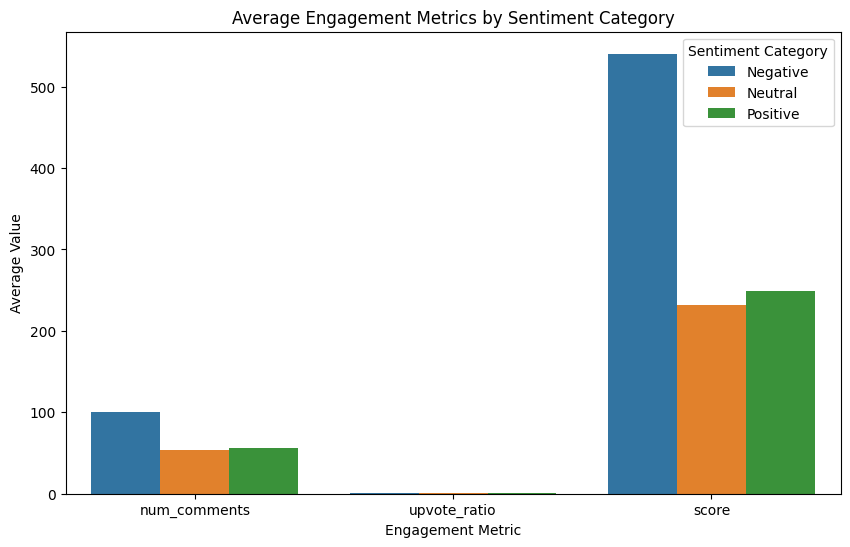

In [4]:

melted_df = pd.melt(df1, id_vars=['sentiment_category'], 
                    value_vars=['num_comments', 'upvote_ratio', 'score'], var_name='Engagement Metric', value_name='Average')

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Engagement Metric', y='Average', hue='sentiment_category', data=melted_df)
plt.title('Average Engagement Metrics by Sentiment Category')
plt.ylabel('Average Value')
plt.xlabel('Engagement Metric')
plt.legend(title='Sentiment Category')

plt.show()


Conclusion: we will use: 

Interactive Dashboard Control: If this visualization will be part of an interactive dashboard, you could allow users to select which metrics to display. This way, users could choose to view upvote_ratio independently of the other two metrics.

#### Visual Two

In [5]:
df2 = pd.read_csv('../Sentiment & Engagement Datasets/engagement_metrics_by_day_and_sentiment.csv')

In [6]:
df2

,day_of_week,sentiment_category,num_comments,upvote_ratio,score
0,Monday,Negative,149.673203,0.785752,758.542484
1,Monday,Neutral,47.690355,0.809492,168.360406
2,Monday,Positive,71.430622,0.808612,281.339713
3,Tuesday,Positive,73.812030,0.816767,382.063910
4,Tuesday,Neutral,48.688679,0.773915,182.882075
5,Tuesday,Negative,119.554286,0.772057,587.702857
6,Wednesday,Positive,61.698485,0.815152,215.156061
7,Wednesday,Negative,91.793103,0.777026,572.637931
8,Wednesday,Neutral,67.984733,0.791336,286.923664
9,Thursday,Positive,59.709720,0.832224,212.121172


In [7]:
pip install --upgrade pandas seaborn


Note: you may need to restart the kernel to use updated packages.


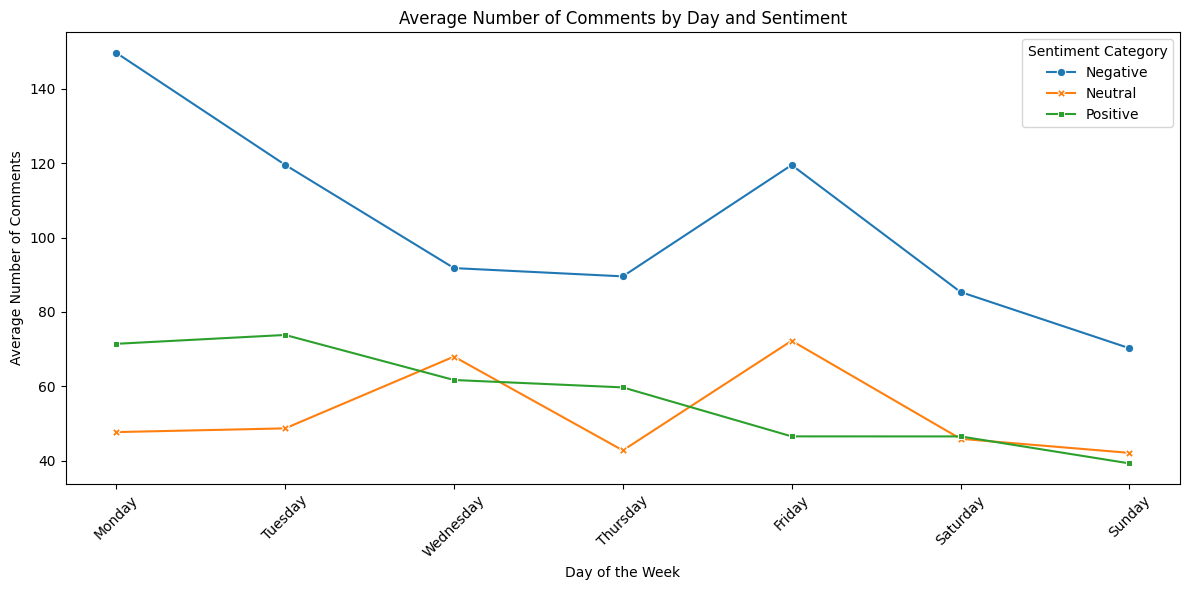

In [8]:


# Now we can create a line plot directly without pivoting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='day_of_week', y='num_comments', hue='sentiment_category', style='sentiment_category', markers=True, dashes=False)
plt.title('Average Number of Comments by Day and Sentiment')
plt.ylabel('Average Number of Comments')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)  
plt.legend(title='Sentiment Category')
plt.tight_layout()  
plt.show()



for the visual type, we will use line chart. when creating the dashboard, we will incorporating a dropdown to allow users to choose the engagement metric. 

#### Visual three:  Distribution Analysis of Sentiment Scores for Top-Performing vs. Low-Performing Posts

In [9]:
df3 = pd.read_csv('../Sentiment & Engagement Datasets/top_performing_posts.csv')

In [10]:
df4 = pd.read_csv('../Sentiment & Engagement Datasets/low_performing_posts.csv')

In [11]:
df4.head(1)

,text,title,author,num_comments,post_id,upvote_ratio,score,url,subreddit,link_flair_text,link_flair_template_id,created_datetime,day_of_week,hour_of_day,month,year,sentiment_score,sentiment_category,performance_category
0,Looking new role havenut much traction Recentl...,Roast my Resume Pls,Neither_Trash,1,1bh8md2,0.99,1,https://i.redd.it/n918fjprlyoc1.jpeg,resumes,Review my resume • I'm in North America,c292b8e0-28b9-11ec-874c-325b17e851a3,2024-03-17 21:05:40,Sunday,21,March,2024,0.6369,Positive,Low-Performing


In [12]:

def plot_sentiment_distribution(selected_subreddit):
  
    top_posts = df3[df3['subreddit'] == selected_subreddit]
    low_posts = df4[df4['subreddit'] == selected_subreddit]

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.histplot(top_posts['sentiment_score'], color='blue', label='Top-Performing', kde=True, alpha=0.6)
    sns.histplot(low_posts['sentiment_score'], color='red', label='Low-Performing', kde=True, alpha=0.6)

    plt.title(f'Distribution of Sentiment Scores for Top vs. Low Performing Posts in {selected_subreddit}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()



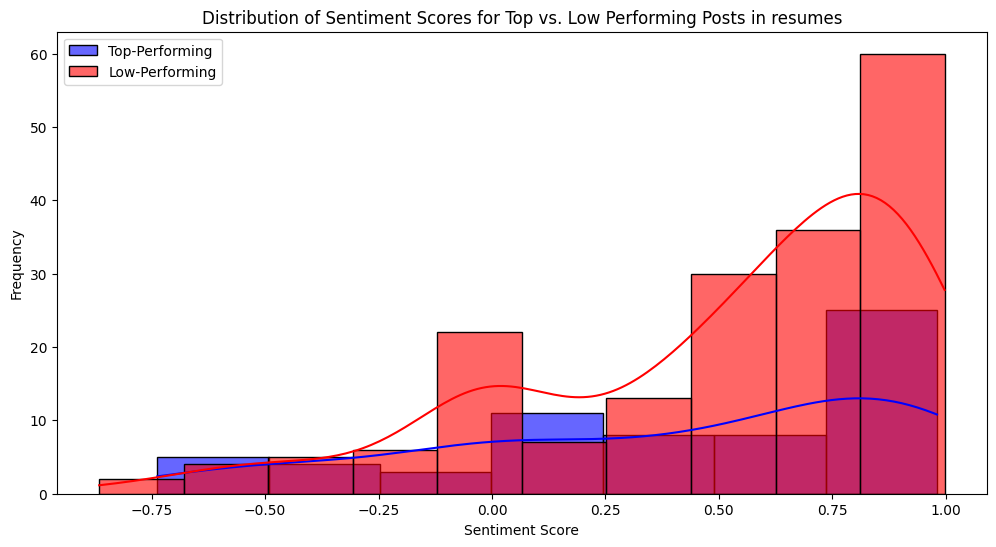

In [13]:
# Example usage
plot_sentiment_distribution('resumes') 

Visual type: histograms with KDE overlays. 

For the Dash implementation, you’ll replace the function plot_sentiment_distribution with a callback that updates a Plotly figure based on the subreddit selected from a dropdown menu.

#### Visual Four: Average Sentiment Scores Comparison (avg_sentiment_scores)

In [14]:
df5 = pd.read_csv('../Sentiment & Engagement Datasets/avg_sentiment_scores.csv')

In [15]:
df5

,subreddit,Low-Performing,Top-Performing
0,AskHR,0.179278,0.111936
1,FinancialCareers,0.559093,0.503300
2,ITCareerQuestions,0.558012,0.524407
3,LegalAdviceOffTopic,-0.048032,-0.094733
4,careeradvice,0.621885,0.291863
5,careerguidance,0.567514,0.454349
6,cscareerquestions,0.656972,0.355896
7,jobs,0.452718,0.186110
8,resumes,0.516891,0.402797
9,sales,0.462591,0.436070


<Figure size 640x480 with 0 Axes>

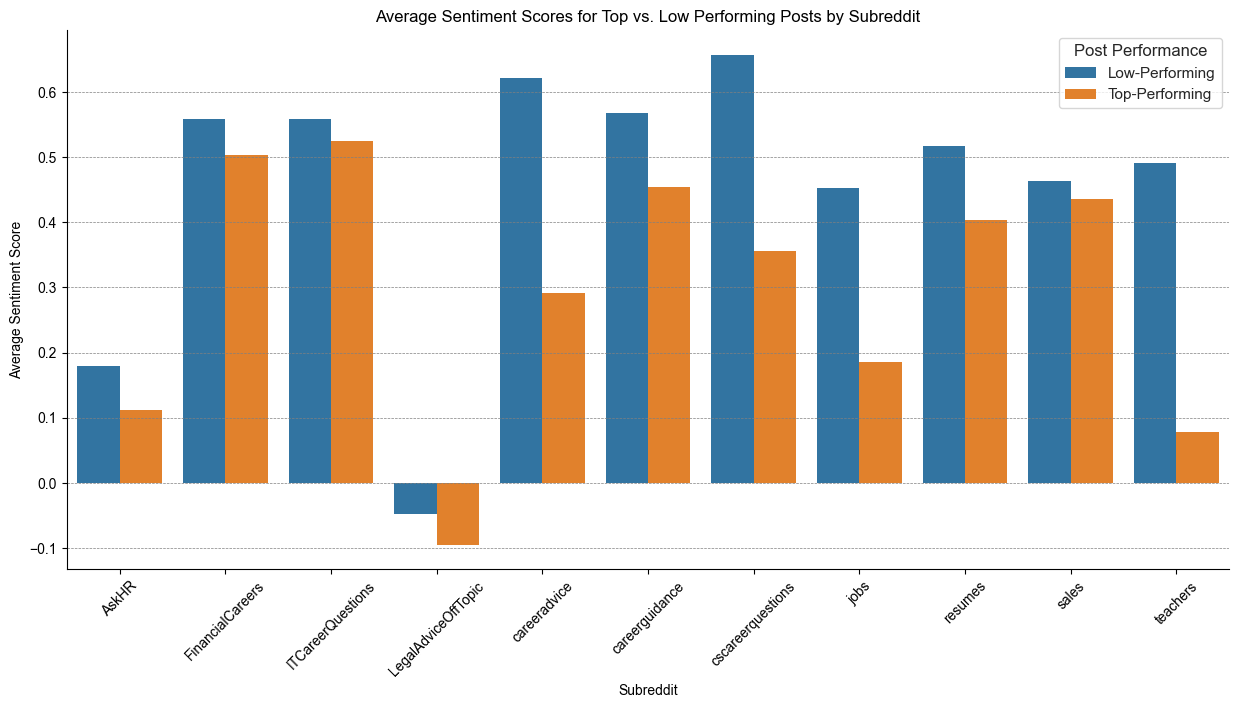

In [16]:

# Melt the DataFrame for plotting
df_melted = df5.melt(id_vars='subreddit', var_name='Performance', value_name='Sentiment Score')

custom_palette = {'Low-Performing': '#1f77b4', 'Top-Performing': '#ff7f0e'}

plt.figure(figsize=(15, 7))
sns.barplot(x='subreddit', y='Sentiment Score', hue='Performance', data=df_melted, 
            palette=custom_palette)

sns.set_theme(style="whitegrid")


plt.title('Average Sentiment Scores for Top vs. Low Performing Posts by Subreddit')
plt.xticks(rotation=45)
plt.xlabel('Subreddit')
plt.ylabel('Average Sentiment Score')


plt.grid(True, linestyle='--', linewidth=0.5, color='grey', axis='y') 


plt.legend(title='Post Performance')

sns.despine()

plt.show()



For the Jupyter Dash dashboard, you can include this type of chart with interactivity that allows users to hover over the bars for more detailed information, like the exact average sentiment score. Also, you can add functionality for users to sort the chart based on either top-performing or low-performing average sentiment scores or alphabetically by subreddit.